In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#My imports
import wrangle as w
import env
import model as m

In [2]:
df = w.get_zillow_data()

In [3]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [4]:
#Clean the zillow data
df = w.clean_zillow(df)

In [5]:
df.head(2)

,bedrooms,bathrooms,square_feet,tax_value,year_built,tax_amount,fips,home_age,county_Los Angeles,county_Orange,county_Ventura
4,4,2.0,3633,296425,2005,6941.39,6037,12,1,0,0
6,3,4.0,1620,847770,2011,10244.94,6037,6,1,0,0


In [6]:
#split data
train, validate, test = m.train_validate_test_split(df, 'tax_value')

In [7]:
print(f' Train length is {len(train)} rows')
print(f' Validate length is {len(validate)} rows')
print(f' Test length is {len(test)} rows')

 Train length is 1430899 rows
 Validate length is 306684 rows
 Test length is 306633 rows


In [8]:
#Scale the data before further splitting
train, validate, test = m.scale_data(train, validate, test, columns_to_scale=['bedrooms', 'bathrooms', 'square_feet','home_age'], return_scaler=False)

In [9]:
train.head(2)

,bedrooms,bathrooms,square_feet,tax_value,year_built,tax_amount,fips,home_age,county_Los Angeles,county_Orange,county_Ventura
1476460,0.4,0.363636,0.294094,82993,1954,1053.85,6037,0.288372,1,0,0
1900077,0.4,0.363636,0.242895,275867,1942,3438.72,6037,0.344186,1,0,0


In [10]:
#Function for model prep
def model_prep(train,validate,test):
    '''
    This function prepares train, validate, test for modeling by dropping columns not necessary
    or compatible with modeling algorithms.
    '''
    # drop columns not needed
    keep_cols = ['bedrooms',
                 'bathrooms',
                 'square_feet',
                 'tax_value',
                 'home_age',
                 'county_Los Angeles',
                 'county_Orange',
                 'county_Ventura']
    
    train = train[keep_cols]
    validate = validate[keep_cols]
    test = test[keep_cols]

    # Split data into predicting variables (X) and target variable (y) and reset the index for each dataframe
    X_train = train.drop(columns='tax_value').reset_index(drop=True)
    y_train = train[['tax_value']].reset_index(drop=True)

    X_validate = validate.drop(columns='tax_value').reset_index(drop=True)
    y_validate = validate[['tax_value']].reset_index(drop=True)

    X_test = test.drop(columns='tax_value').reset_index(drop=True)
    y_test = test[['tax_value']].reset_index(drop=True)
    
    return X_train, X_validate, X_test, y_train, y_validate, y_test

In [11]:
X_train, X_validate, X_test, y_train, y_validate, y_test = model_prep(train,validate,test)

In [13]:
X_train.head(2)

,bedrooms,bathrooms,square_feet,home_age,county_Los Angeles,county_Orange,county_Ventura
0,0.4,0.363636,0.294094,0.288372,1,0,0
1,0.4,0.363636,0.242895,0.344186,1,0,0


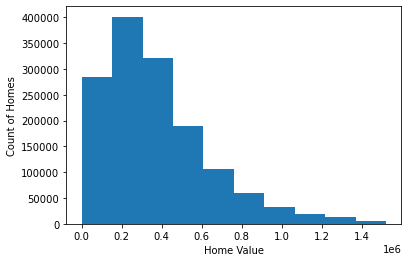

In [15]:
#Visualizing Target Variable
plt.hist(y_train)
plt.xlabel('Tax Value')
plt.ylabel('Count of Homes')
plt.show()

In [16]:
# put y_train and y_validate into dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

In [17]:
# 1. Predict tax_value_mean
tax_value_mean = y_train['tax_value'].mean()
y_train['tax_value_mean'] = tax_value_mean
y_validate['tax_value_mean'] = tax_value_mean

In [18]:
# 2. compute tax_value_median
tax_value_median = y_train['tax_value'].median()
y_train['tax_value_median'] = tax_value_median
y_validate['tax_value_median'] = tax_value_median

In [ ]:
3. RMSE of tax_value_mean
rmse_train = mean_squared_error(y_train.G3, y_train.G3_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.G3, y_validate.G3_pred_mean)**(1/2)